In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures

In [25]:
df = pd.read_csv('owid-covid-data.csv')
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [26]:
df1 = df[df['location'].str.contains('Thailand')]
df1.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139794,THA,Asia,Thailand,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139795,THA,Asia,Thailand,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139796,THA,Asia,Thailand,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139797,THA,Asia,Thailand,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN
139798,THA,Asia,Thailand,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,...,1.9,38.8,90.67,2.1,77.15,0.777,NaN,NaN,NaN,NaN


In [27]:
df1.shape

(751, 67)

In [28]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [29]:
Thai = df1[['date','new_cases']]
Thai

,date,new_cases
139794,2020-01-04,NaN
139795,2020-01-05,NaN
139796,2020-01-06,NaN
139797,2020-01-07,NaN
139798,2020-01-08,NaN
...,...,...
140540,2022-01-19,44447.0
140541,2022-01-20,8640.0
140542,2022-01-21,8112.0
140543,2022-01-22,7686.0


In [30]:
Thai.dtypes

date          object
new_cases    float64
dtype: object

In [35]:
Thai['date'] = pd.to_datetime(Thai['date'])
Thai.index = Thai['date']
Thai.index = (Thai.index - pd.to_datetime('1970-01-01')).days

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
Thai.dtypes

date         datetime64[ns]
new_cases           float64
dtype: object

In [38]:
Thai

,date,new_cases
date,,
18265,2020-01-04,NaN
18266,2020-01-05,NaN
18267,2020-01-06,NaN
18268,2020-01-07,NaN
18269,2020-01-08,NaN
...,...,...
19011,2022-01-19,44447.0
19012,2022-01-20,8640.0
19013,2022-01-21,8112.0


In [39]:
Thai.isnull().sum()

date          0
new_cases    19
dtype: int64

In [40]:
Thai = Thai.fillna(0)
Thai.isnull().sum()

date         0
new_cases    0
dtype: int64

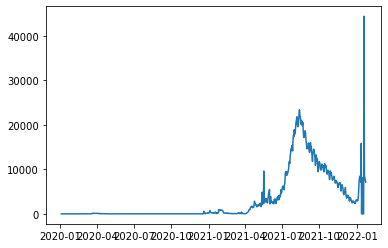

In [42]:
plt.plot(Thai.date, Thai.new_cases)

In [43]:
Thai.describe()

,new_cases
count,751.000000
mean,3175.279627
std,5494.969998
min,-10.000000
25%,5.000000
50%,89.000000
75%,3892.500000
max,44447.000000


In [44]:
Thai

,date,new_cases
date,,
18265,2020-01-04,0.0
18266,2020-01-05,0.0
18267,2020-01-06,0.0
18268,2020-01-07,0.0
18269,2020-01-08,0.0
...,...,...
19011,2022-01-19,44447.0
19012,2022-01-20,8640.0
19013,2022-01-21,8112.0


In [45]:
x = Thai.index
y = Thai.new_cases
x = np.array(x).reshape((-1,1))

In [46]:
model = LinearRegression()
model = LinearRegression().fit(x,y)

In [47]:
transformer = PolynomialFeatures(degree=3,include_bias=False)

In [48]:
x_new = transformer.fit_transform(x)

In [49]:
model = LinearRegression().fit(x_new,y)

In [50]:
model.score(x_new, y)

0.5030797439160957

In [51]:
y_pred = model.predict(x_new)

In [52]:
x_new = np.arange(len(Thai), len(Thai)+140)
X_New = np.array(x_new).reshape(-1,1)

In [53]:
x_new.shape

(140,)

In [54]:
x_new.shape

(140,)

In [55]:
X_New_ = transformer.fit_transform(X_New)

In [21]:
y_Pred = model.predict(X_New_)

In [22]:
y_Pred.shape

(751,)

In [23]:
x_new.shape

(751,)

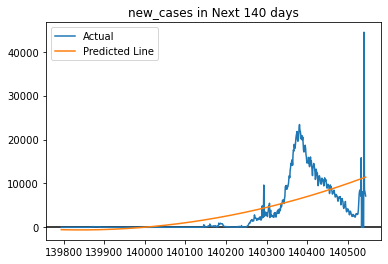

In [25]:
plt.axhline(y=0, color = 'black')
plt.plot(x,y,label = "Actual")
plt.plot( x,y_pred,label = "Predicted Line")
plt.title("new_cases in Next 140 days")
plt.legend()

plt.show()